In [101]:
# Importations
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline
# les données
digits = datasets.load_digits()
# Contenu et mode d’obtention



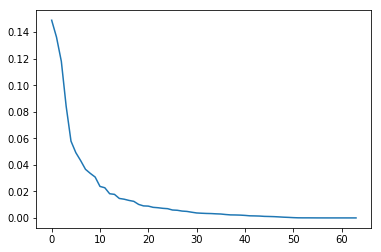

In [9]:
from sklearn.decomposition import PCA
X=digits.data
y=digits.target
target_name=[0,1,2,3,4,5,6,7,8,9]
# définition de la commande
pca = PCA()
# Estimation, calcul des composantes principales
C = pca.fit(X).transform(X)
# Décroissance de la variance expliquée
plt.plot(pca.explained_variance_ratio_)
plt.show()


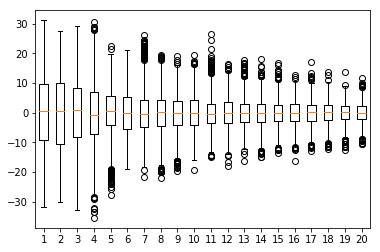

In [10]:
plt.boxplot(C[:,0:20])
plt.show()

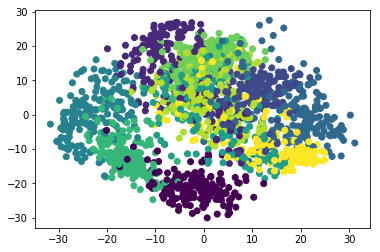

In [11]:
plt.scatter(C[:,0], C[:,1], c=y, label=target_name)
plt.show()

In [12]:
C

array([[  1.25946645e+00,  -2.12748835e+01,   9.46305462e+00, ...,
          1.10218455e-15,   6.52809920e-16,   6.91392699e-16],
       [ -7.95761130e+00,   2.07686990e+01,  -4.43950604e+00, ...,
         -5.95252988e-17,  -1.18169644e-15,  -1.67046393e-16],
       [ -6.99192297e+00,   9.95598641e+00,  -2.95855808e+00, ...,
         -4.50990710e-15,  -3.98791387e-15,  -1.16654252e-16],
       ..., 
       [ -1.08012837e+01,   6.96025223e+00,  -5.59955453e+00, ...,
          5.34458713e-15,   2.57813217e-15,  -9.70809841e-17],
       [  4.87210009e+00,  -1.24239536e+01,   1.01708664e+01, ...,
         -4.55349910e-15,  -1.04807642e-15,   1.23762878e-16],
       [  3.44389631e-01,  -6.36554919e+00,  -1.07737085e+01, ...,
         -1.02004739e-15,   1.26152493e-15,  -2.70670966e-16]])

In [102]:
from astropy.table import Table
import os

files = os.listdir("/renoir_data_02/jpreyes/lsst_data/light_curves/second_set")


In [103]:
import numpy as np

In [104]:
data = []
tables = []
for i, f in enumerate(files):
    curve = []

    t = Table.read("/renoir_data_02/jpreyes/lsst_data/light_curves/second_set/"+f, format='ascii')
    tables.append(t)

    
    for row in t:
        if np.isnan(row["flux"])==False and row["flux"]<5000:
            curve.append(row["flux"])
            
    data.append(curve)

In [133]:
subT= []
for table in tables:
    if len(table)>21:
            subT.append(table)

In [126]:
stds = []
for t in subT:
    values = []
    days = []
    counter = 0
    mjd = 0.0
    for row in t:
       
        if np.isnan(row["flux"]) == False:
            if row["mjd"] != mjd:             
                if counter > 1:
                    stds.append( np.std(values))    
                counter = 0
                values = []
                days = []
            counter +=1
            mjd = row["mjd"]
            days.append(mjd)
            values.append(row["flux"])    
            
            
        

In [134]:
lens = []
for t in subT:
    lens.append(len(t))

(array([ 616.,  289.,  147.,   54.,   17.,   13.,   10.,    5.,    6.,    2.]),
 array([ 22. ,  28.7,  35.4,  42.1,  48.8,  55.5,  62.2,  68.9,  75.6,
         82.3,  89. ]),
 <a list of 10 Patch objects>)

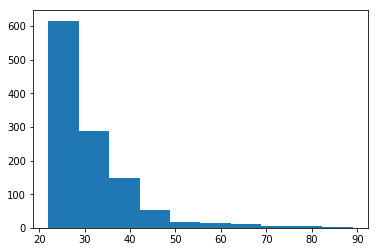

In [135]:
len(subT)
plt.hist(lens)

In [128]:
stds

[0.12626993656158447,
 0.20128512382507324,
 0.011004090309143066,
 0.08066105842590332,
 0.29247748851776123,
 0.21383857727050781,
 0.029520511627197266,
 0.076467633247375488,
 0.035595893859863281,
 0.0024592876434326172,
 0.20707297325134277,
 0.079108238220214844,
 0.54580211639404297,
 0.34371566772460938,
 12.391249179840088,
 0.13848209381103516,
 1.052960917810138,
 9.0802589504653426,
 0.61027491092681885,
 0.07960876077413559,
 35.195383548736572,
 0.44719465915113688,
 1.2940002977848053,
 34.772789914160967,
 9.4138097891959642,
 22.386149406433105,
 3.1839447063144477,
 5.8367088139057159,
 0.091042041778564453,
 3.1794558465480804,
 0.016721248626708984,
 0.014400005340576172,
 0.16776084899902344,
 45.826176922953252,
 10.150852918624878,
 6.3771519984527982,
 2.7521713367513754,
 0.059848308563232422,
 0.23213386535644531,
 10.186020374298096,
 0.26034641265869141,
 0.37087512016296387,
 0.53495311737060547,
 9.8532460666483583,
 0.083038330078125,
 7.891845703125,
 1

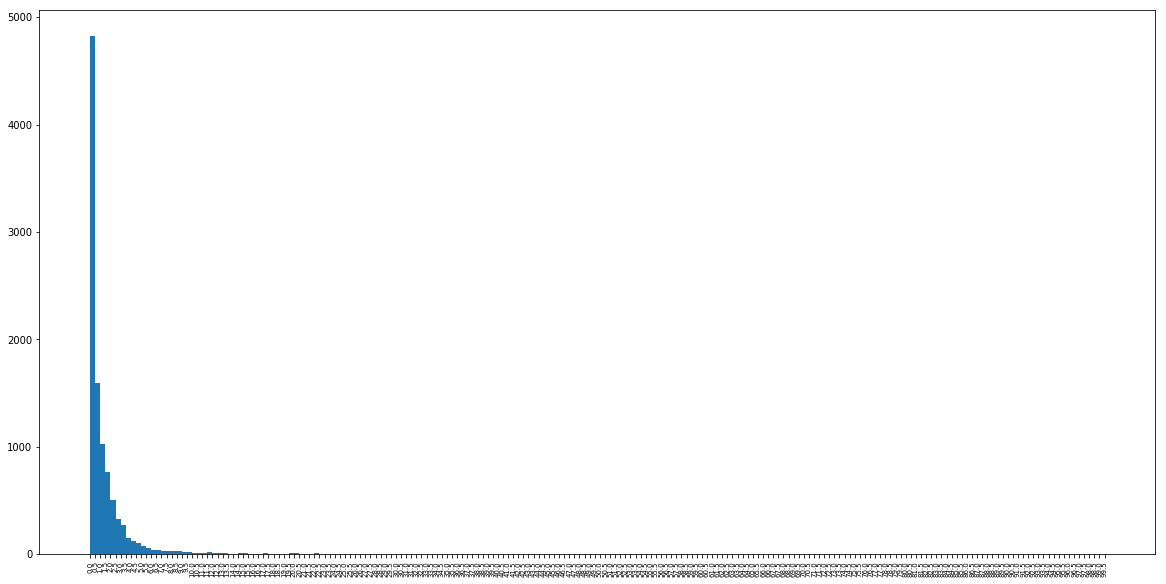

In [132]:
plt.figure(figsize=(20,10))
plt.hist(stds, bins=np.arange(0,100,0.5))

plt.xticks(np.arange(0,100,0.5), size=7, rotation='vertical')
plt.show()

In [9]:
from sklearn import decomposition
from sklearn import datasets

pca = decomposition.PCA(n_components=3)
pca.fit(data)
#C = pca.fit(n_data).transform(n_data)

/renoir_data_00/fouchez/lsst/DM/stacks/lsstsw/2016-04-04/lsstsw/miniconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: setting an array element with a sequence.

In [65]:
n_data = np.array(data, dtype=float)

ValueError: setting an array element with a sequence.

In [66]:
data = np.empty([1, len(files)], dtype=float)

In [31]:
points = []
for d in data:
    if len(d) > 80:
        e = d
    points.append(len(d))

(array([  3.00000000e+01,   1.61000000e+02,   7.37000000e+02,
          1.65120000e+04,   1.37240000e+04,   4.25700000e+03,
          3.01900000e+03,   1.93700000e+03,   1.59200000e+03,
          1.11000000e+03,   9.06000000e+02,   7.27000000e+02,
          6.28000000e+02,   4.87000000e+02,   4.60000000e+02,
          3.70000000e+02,   3.59000000e+02,   3.00000000e+02,
          2.62000000e+02,   2.50000000e+02,   2.06000000e+02,
          1.86000000e+02,   1.52000000e+02,   1.33000000e+02,
          7.90000000e+01,   4.60000000e+01,   5.30000000e+01,
          3.80000000e+01,   3.90000000e+01,   3.70000000e+01,
          3.90000000e+01,   3.40000000e+01,   3.20000000e+01,
          2.90000000e+01,   2.60000000e+01,   1.40000000e+01,
          2.20000000e+01,   1.90000000e+01,   3.60000000e+01]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 <a li

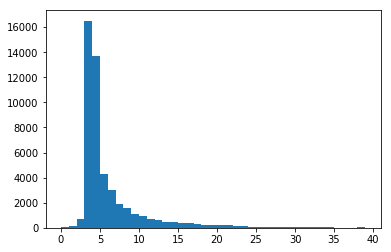

In [26]:
plt.hist(points, bins=range(0, 40, 1))

In [27]:
max(points)

85

In [32]:
e

[-5.5101232528686523,
 -5.6327857971191406,
 -5.4114608764648438,
 -5.5098676681518555,
 -5.6987791061401367,
 -5.8275632858276367,
 -5.6533303260803223,
 -5.8337521553039551,
 -5.6357474327087402,
 -5.8091006278991699,
 -5.6239471435546875,
 -5.720766544342041,
 -5.7817106246948242,
 -5.6629481315612793,
 -4.7006983757019043,
 -4.8384609222412109,
 -4.781609058380127,
 -4.8091864585876465,
 -3.9308602809906006,
 -4.0970492362976074,
 -3.9317443370819092,
 -4.7171134948730469,
 -4.8730754852294922,
 -4.6907711029052734,
 -4.7601180076599121,
 -6.074089527130127,
 -6.2184648513793945,
 -5.9805541038513184,
 -6.0986275672912598,
 -5.270535945892334,
 -5.377171516418457,
 -5.2060613632202148,
 -5.3060107231140137,
 -5.7946171760559082,
 -5.8965415954589844,
 -5.7460241317749023,
 -5.8950605392456055,
 -5.2568597793579102,
 -5.3290328979492188,
 -5.1366381645202637,
 -5.2556009292602539,
 -5.2238988876342773,
 -5.3096909523010254,
 -5.2544612884521484,
 -6.2184104919433594,
 -6.34076261520